# Meme Kanseri Teşhisi Projesi
---

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*pxFCmhRFTighUn88baLcSA.png)

---

### Breast Cancer Winconsin veri seti, meme kanseri teşhisine yönelik özellikleri içerir.
### Veri setinde 569 örnek ve 32 sütun bulunur.
### Özellikler, bir meme kitlesinin ince iğne aspiratının (FNA) sayısallaştırılmış görüntüsünden hesaplanır. Görüntüde bulunan hücre çekirdeklerinin özelliklerini tanımlarlar. Her bir hücre çekirdeği için 10 gerçek değerli özellik (radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension) ve bunların mean, standard error ve worst değerleri yer alır.

---

###  *Diagnosis* : Hedef Değişken

--
####  M: **malign** (Kötü Huylu Tümör)
####  B: **benign** (İyi Huylu Tümör)
--

### Her bir hücre çekirdeği için on adet gerçek değerli özellik hesaplanmıştır:


*   radius      : Yarıçap (merkezden çevre üzerindeki noktalara olan uzaklıkların ortalaması)
*   texture     : Doku (gri ölçekli değerlerin standart sapması)
*   perimeter   : Çevre
*   area        : Alan
*   smoothness  : Pürüzsüzlük (yarıçap uzunluklarında yerel varyasyon)
*   compactness : Kompaktlık (çevre^2 / alan - 1.0)
*   concavity   : İçbükeylik (konturun içbükey kısımlarının şiddeti)
*   concave points : İçbükey noktalar (konturun içbükey kısımlarının sayısı)
*   symmetry    : Simetri
*   fractal dimension : Fraktal boyut (“kıyı şeridi yaklaşımı” - 1)

---





# Kütüphane İmport İşlemleri

In [ ]:
# Veri manipülasyonu ve görselleştirme için

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Makine öğrenmesi ve model için

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix


# Uyarıları kapatmak için

import warnings
warnings.filterwarnings('ignore')



# Veri Analizi

In [ ]:
# Veri setini yükleme

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target

# 0: Malignant (Kötü)
# 1: Benign (İyi)

In [ ]:
# Veriyi düzgün görmek adına ayarlama yapalım

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)



In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.groupby('diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
# Sınıf dağılımı

print("\nSınıf Dağılımı:")
print(df['diagnosis'].value_counts())


Sınıf Dağılımı:
diagnosis
1    357
0    212
Name: count, dtype: int64


1 --> Benign

0 --> Malignant

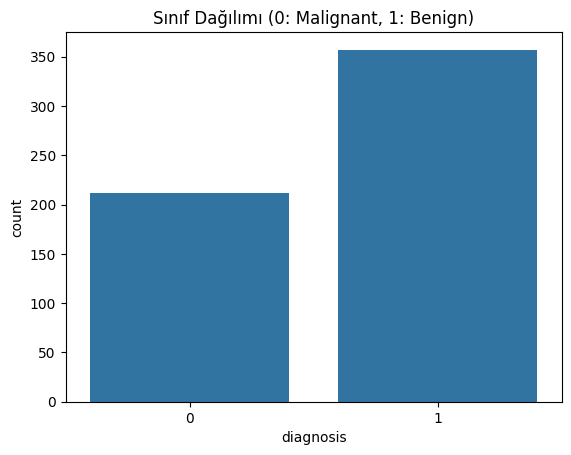

In [ ]:
# Sınıf dağılımını görselleştirelim

sns.countplot(x='diagnosis', data=df)
plt.title('Sınıf Dağılımı (0: Malignant, 1: Benign)')
plt.show()

# Veri Ön işleme

## Veri Setini Bölme: Eğitim ve test setlerine ayıracağız.

In [ ]:
# Özellikler ve hedef değişken olarak ayıralım

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


# Eğitim ve test setlerine ayırma (80% eğitim, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaler işlemi

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("Eğitim seti boyutu:", X_train_scaled.shape)
print("Test seti boyutu:", X_test_scaled.shape)

Eğitim seti boyutu: (455, 30)
Test seti boyutu: (114, 30)


# Model Oluşturma

![](https://media.geeksforgeeks.org/wp-content/uploads/20240130162938/random.webp)

## Random Forest kullanıyoruz çünkü

* Büyük veri kümelerini ve yüksek boyutlu verileri işleyebilir.
* Birçok karar ağacından gelen tahminleri birleştirerek, tek bir karar ağacına kıyasla aşırı uyum riskini azaltır.
* Gürültülü verilere karşı dayanıklıdır ve kategorik verilerle iyi çalışır.
* RandomForestClassifier, birden fazla karar ağacının tahminlerini birleştirerek daha doğru ve kararlı sonuçlar elde eden bir yöntemdir.
* Özellikle sınıflandırma problemlerinde, çoğunluk oylaması prensibiyle çalışarak, farklı karar ağaçlarının tahminlerini birleştirir. Bu, modelin gürültüye karşı daha dirençli olmasını ve daha güvenilir sonuçlar vermesini sağlar.
* n_estimators=100, modelde kullanılacak karar ağacı sayısını belirtir ve random_state=42, sonuçların tekrarlanabilirliğini sağlar. Bu parametreler, random forest modelinin performansını etkiler ve genellikle çapraz doğrulama ve hiperparametre optimizasyonu ile en iyi değerleri bulunur.

In [ ]:
# Random Forest modelini oluşturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# MODEL EĞİTİMİ
rf_model.fit(X_train_scaled, y_train)

# Eğitim setinde tahmin
y_train_pred = rf_model.predict(X_train_scaled)

# Test setinde tahmin
y_test_pred = rf_model.predict(X_test_scaled)

##Performans Değerlendirmesi


Eğitim Seti Performansı:
Accuracy: 1.0000
Precision: 1.0000

Test Seti Performansı:
Accuracy: 0.9649
Precision: 0.9589

Test Seti Sınıflandırma Raporu:
              precision    recall  f1-score   support

   Malignant       0.98      0.93      0.95        43
      Benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



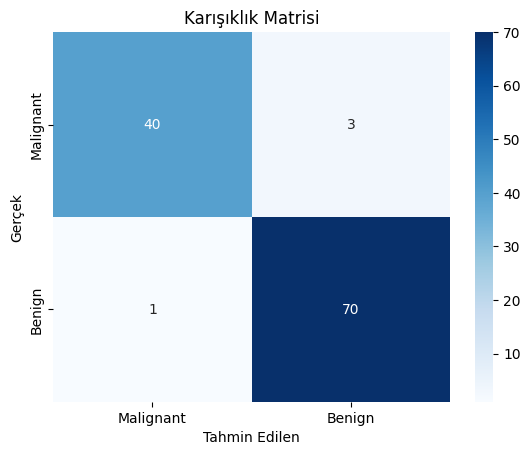

In [ ]:
# Eğitim seti performansı
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)

# Test seti performansı
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

print("\nEğitim Seti Performansı:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")

print("\nTest Seti Performansı:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")

# Detaylı sınıflandırma raporu
print("\nTest Seti Sınıflandırma Raporu:")
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))


cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

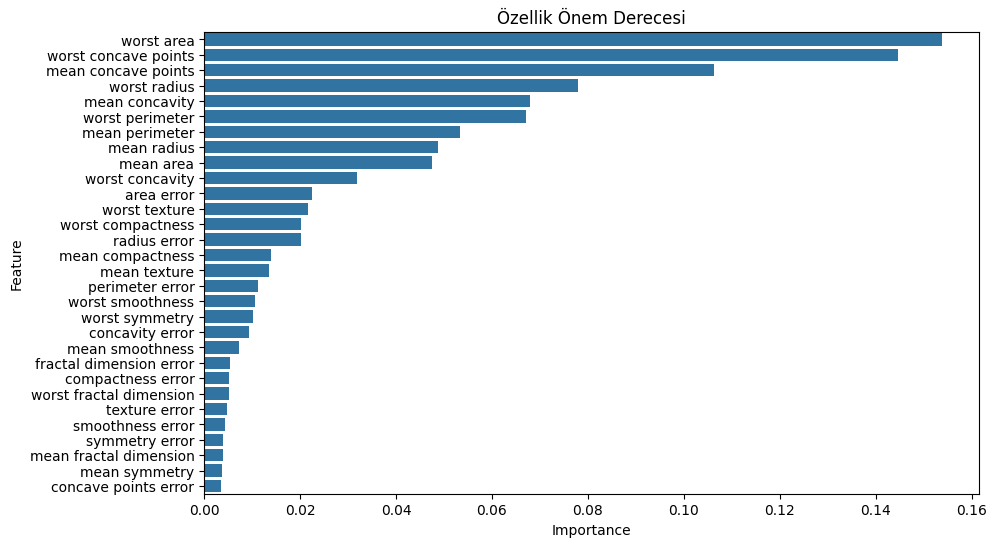

In [ ]:
# Özellik önem derecesi

importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Özellik Önem Derecesi')
plt.show()

# **Teşhiste Özellik Önem Derecesine Göre Kriterler**

* **Worst Area** =  Büyük bir worst area, çekirdeğin anormal derecede büyük olduğunu gösterir, bu da genellikle kanserli (malignant) hücrelerle ilişkilidir. Kanser hücreleri kontrolsüz büyür ve daha büyük çekirdekler oluşturabilir.
Malignant tümörler, benign tümörlere kıyasla daha hızlı büyüyerek daha büyük alanlara sahip olma eğilimindedir.

* **Worst Concave Points** = Konkav noktalar, çekirdeğin düzgün olmayan, girintili-çıkıntılı bir şekle sahip olduğunu gösterir. Malignant hücreler genellikle daha düzensiz şekilli çekirdeklere sahiptir, bu da daha fazla konkav noktaya yol açar.
Bu özellik, hücrenin morfolojik anormalliklerini ölçer ve kanserli hücrelerin karakteristik düzensizliğini yakalar.

* **Mean Concave Points** = Ortalama konkav noktalar, çekirdeğin genel şekil düzensizliğini ölçer. Malignant hücrelerde, çekirdeklerin konturları daha fazla içe çökük bölge içerir, bu da daha yüksek ortalama konkav nokta değerlerine yol açar.
Bu özellik, hücrenin tümörün genel morfolojik özelliklerini temsil eder.

* **Worst Radius** = Büyük bir worst radius, çekirdeğin anormal derecede büyük olduğunu gösterir. Malignant hücreler, benign hücrelere kıyasla daha büyük ve kontrolsüz büyüyen çekirdeklere sahiptir.
Bu özellik, hücrenin boyutunu ölçer ve kanserli hücrelerin büyüme eğilimini yakalar.

* **Mean Concavity** = Yüksek mean concavity, çekirdeğin konturunun daha fazla ve daha derin içe çökük bölgelere sahip olduğunu gösterir. Bu, malignant hücrelerin düzensiz ve anormal şekilleriyle ilişkilidir.
Konkavlık, hücrenin morfolojik karmaşıklığını ölçer ve kanserli hücrelerin karakteristik özelliklerini yakalar.

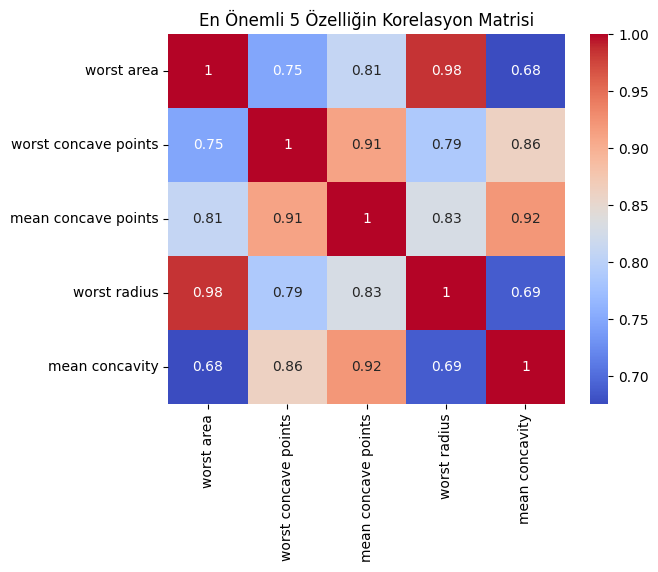

In [ ]:
features = ['worst area', 'worst concave points', 'mean concave points', 'worst radius', 'mean concavity']

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('En Önemli 5 Özelliğin Korelasyon Matrisi')
plt.show()

# Örnek Bir Veri ile Modelin Test Edilmesi

In [ ]:
# Örnek Test verisi ile tahmin yapalım

input_data = (13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766,
              0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023,
              15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259)

# Veriyi NumPy dizisine çevirme
input_data_as_numpy_array = np.asarray(input_data)

# Veriyi tek bir örnek için yeniden şekillendirme
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Tahmin
prediction = rf_model.predict(input_data_reshaped)
print("Tahmin:", prediction)

# Tahmin sonucunu
if prediction[0] == 0:
    print('The Breast Cancer is Malignant')
else:
    print('The Breast Cancer is Benign')


Tahmin: [0]
The Breast Cancer is Malignant


# Genel Analiz ve Neden Önemliler?
---

## 1- Morfolojik ve Boyutsal Özellikler:

Bu beş özelliğin tümü, hücre çekirdeğinin boyutunu (worst area, worst radius) ve şekil düzensizliklerini (worst concave points, mean concave points, mean concavity) ölçer. Malignant hücreler, benign hücrelere kıyasla daha büyük ve daha düzensiz çekirdeklere sahip olduğundan, bu özellikler sınıflandırma için çok önemlidir.


Özellikle worst değerler (en kötü durumlar), tümörün en agresif özelliklerini yakalayarak modelin malignant sınıflandırmasını güçlendirir.



## 2- Random Forest’taki Rolü:

Random Forest, özelliklerin sınıflandırma kararlarındaki etkisini Gini impurity veya information gain gibi ölçütlerle değerlendirir. Bu özellikler, sınıflar arasında en fazla ayrımı sağladığı için yüksek önem derecesine sahiptir.


Örneğin, worst area ve worst radius, büyük değerleriyle malignant sınıfa işaret ederken, concave points ve concavity, şekil düzensizlikleriyle malignant sınıflandırmasını destekler.


## 3- Korelasyon:

Worst area ve worst radius arasında yüksek korelasyon olması muhtemeldir, çünkü alan, yarıçapa bağlıdır. Ancak, Random Forest bu tür korelasyonlara karşı nispeten duyarsızdır.
Mean concavity ve mean concave points da benzer şekilde ilişkilidir, ancak konkavlık derinliği, konkav noktalar ise sayıyı ölçer; bu nedenle her biri farklı bir perspektif sunar.

## 4- Tıbbi Bağlamda Önemi:

Bu özellikler, biyopsi örneklerinde kanserli hücrelerin tanınmasında kullanılan gerçek dünya ölçümlerini yansıtır. Örneğin, patologlar hücre çekirdeklerinin boyutunu ve şeklini mikroskop altında değerlendirirken benzer özelliklere odaklanır.
Yanlış negatifleri azaltma açısından, bu özellikler malignant vakaları tespit etmede kritik rol oynar.